In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [4]:
df.tail()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
188528,188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes,27500
188529,188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,30000
188530,188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,86900
188531,188531,Audi,S5 3.0T Prestige,2022,13895,Gasoline,3.0L,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN,84900
188532,188532,Porsche,Macan Base,2016,59500,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,28995


In [5]:
df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [7]:
df.isnull().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [8]:
df.dropna(subset=['fuel_type', 'clean_title', 'accident'], inplace=True)


In [10]:
df.isnull().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [12]:
df.drop(columns=['int_col', 'id'], inplace=True)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162610 entries, 0 to 188532
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   brand         162610 non-null  object
 1   model         162610 non-null  object
 2   model_year    162610 non-null  int64 
 3   milage        162610 non-null  int64 
 4   fuel_type     162610 non-null  object
 5   engine        162610 non-null  object
 6   transmission  162610 non-null  object
 7   ext_col       162610 non-null  object
 8   accident      162610 non-null  object
 9   clean_title   162610 non-null  object
 10  price         162610 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 14.9+ MB


In [17]:
threshold = 0.6 * len(df)
cols_with_nulls = df.columns[df.isnull().mean() > 0.6]
df.drop(columns=cols_with_nulls, inplace=True)

In [18]:
df

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,accident,clean_title,price
0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,None reported,Yes,4200
1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,At least 1 accident or damage reported,Yes,4999
2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,None reported,Yes,13900
3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,None reported,Yes,45000
4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,None reported,Yes,97500
...,...,...,...,...,...,...,...,...,...,...,...
188527,Chevrolet,Camaro Z28,1999,110000,Gasoline,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,White,None reported,Yes,14500
188528,Cadillac,Escalade ESV Platinum,2017,49000,Gasoline,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,None reported,Yes,27500
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,Gasoline,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,At least 1 accident or damage reported,Yes,30000
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,Gasoline,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,None reported,Yes,86900


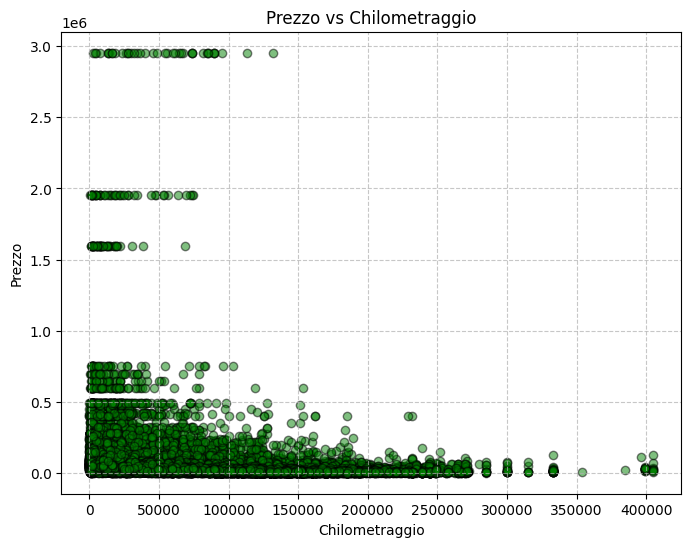

In [19]:
plt.figure(figsize=(8, 6))
plt.scatter(df['milage'], df['price'], alpha=0.5, c='green', edgecolor='black')
plt.title("Prezzo vs Chilometraggio")
plt.xlabel("Chilometraggio")
plt.ylabel("Prezzo")
plt.grid(linestyle='--', alpha=0.7)
plt.show()

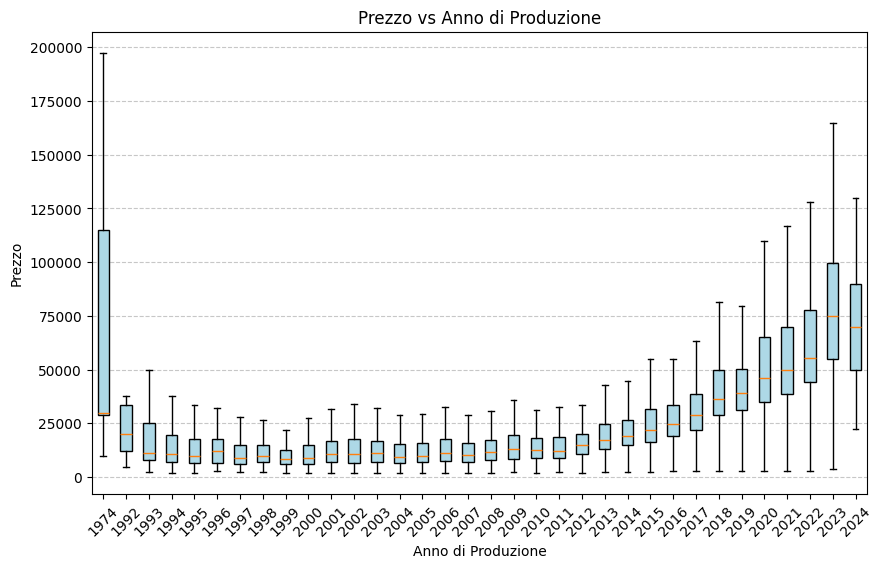

In [20]:
plt.figure(figsize=(10, 6))
boxplot_data = [df[df['model_year'] == year]['price'] for year in sorted(df['model_year'].dropna().unique())]
plt.boxplot(boxplot_data, showfliers=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Prezzo vs Anno di Produzione")
plt.xlabel("Anno di Produzione")
plt.ylabel("Prezzo")
plt.xticks(ticks=range(1, len(boxplot_data) + 1), labels=sorted(df['model_year'].dropna().unique()), rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [22]:

df = pd.get_dummies(df, columns=['fuel_type', 'clean_title', 'accident'], drop_first=True)


In [29]:
df

,brand,model,model_year,milage,engine,transmission,ext_col,price,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_not supported,fuel_type_–,accident_None reported
0,MINI,Cooper S Base,2007,213000,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,4200,False,True,False,False,False,False,True
1,Lincoln,LS V8,2002,143250,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,4999,False,True,False,False,False,False,False
2,Chevrolet,Silverado 2500 LT,2002,136731,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,13900,True,False,False,False,False,False,True
3,Genesis,G90 5.0 Ultimate,2017,19500,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,45000,False,True,False,False,False,False,True
4,Mercedes-Benz,Metris Base,2021,7388,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,97500,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188527,Chevrolet,Camaro Z28,1999,110000,310.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,A/T,White,14500,False,True,False,False,False,False,True
188528,Cadillac,Escalade ESV Platinum,2017,49000,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,27500,False,True,False,False,False,False,True
188529,Mercedes-Benz,AMG C 43 AMG C 43 4MATIC,2018,28600,385.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,30000,False,True,False,False,False,False,False
188530,Mercedes-Benz,AMG GLC 63 Base 4MATIC,2021,13650,469.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,86900,False,True,False,False,False,False,True
